In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# 시스템이 Windows일 경우
if platform.system() == 'Windows':
    plt.rc('font', family='Pretendard')
# macOS일 경우 예시:
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')

# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

### 피처 재선정 (2차 분석 반영 VFN, 상관계수 등)

In [3]:
# 1. 회원정보
features_member = [
    '남녀구분코드',
    '회원여부_이용가능_카드론', '입회경과개월수_신용', '회원여부_연체', '동의여부_한도증액안내',
    '탈회횟수_누적', '탈회횟수_발급1년이내',
    '거주시도명',
    '유효카드수_신용체크', 
    '이용카드수_신용체크', 
    '이용금액_R3M_신용체크', 
    '보유여부_해외겸용_본인', '이용여부_3M_해외겸용_본인',
    '연회비발생카드수_B0M', '기본연회비_B0M', '제휴연회비_B0M'
]

In [4]:
# 2. 신용정보
features_credit = [
    '최초한도금액',
    '카드이용한도금액', 'CA한도금액',
    '일시상환론한도금액', '월상환론한도금액',
    'CA이자율_할인전',
    'RV일시불이자율_할인전', 'RV현금서비스이자율_할인전',
    'RV약정청구율', 'RV최소결제비율',
    '한도증액횟수_R12M',
    '한도증액금액_R12M', '상향가능CA한도금액', '월상환론상향가능한도금액',
    '일시불ONLY전환가능여부', '특별한도보유여부_R3M', '연체감액여부_R3M'
]

In [5]:
# 3. 승인매출정보
features_tx = [
    '이용건수_신용_B0M',
    '이용금액_일시불_B0M', '이용후경과월_신용', '이용후경과월_일시불', '이용후경과월_체크',
    '이용금액_해외', '쇼핑_도소매_이용금액', '쇼핑_마트_이용금액', '쇼핑_온라인_이용금액',
    '교통_주유이용금액', '교통_정비이용금액', '여유_숙박이용금액',
    '할부건수_3M_R12M', '할부금액_3M_R12M',
    'RP건수_B0M', 'RP건수_통신_B0M', 'RP건수_보험_B0M', 'RP건수_교통_B0M', 'RP후경과월',
    '카드론이용건수_누적', '카드론이용금액_누적', '최종카드론_대출이율', '최종카드론_대출금액',
    '이용건수_온라인_R6M', '이용건수_페이_온라인_R6M',
    '이용건수_A페이_R6M', '이용건수_C페이_R6M', '이용건수_D페이_R6M',
    '이용금액_선결제_R6M', '이용건수_선결제_R6M',
    '연체입금원금_B0M', '정상청구원금_B5M', '선입금원금_B2M',
    '연속유실적개월수_기본_24M_카드',
    '승인거절건수_R3M', '승인거절건수_한도초과_R3M',
    '이용금액대'  # 범주형
]

In [6]:
# 4. 청구입금정보
features_bill = [
    '청구서발송여부_B0', '청구서발송여부_R3M', '청구서발송여부_R6M',
    '청구금액_B0', '청구금액_R3M', '청구금액_R6M',
    '포인트_마일리지_건별_B0M', '포인트_포인트_건별_B0M', '포인트_마일리지_월적립_B0M', '포인트_포인트_월적립_B0M',
    '마일_적립포인트_R3M', '마일_잔여포인트_B0M', '포인트_이용포인트_R12M',
    '할인건수_R3M', '할인금액_R3M', '할인건수_B0M',
    '혜택수혜금액_R3M', '포인트_마일리지_환산_B0M'
]

In [7]:
# 5. 잔액정보
features_balance = [
    '잔액_일시불_B0M', '잔액_할부_B0M',
    '연체잔액_B0M',
    '연체원금_최근', '매각잔액_B1M',
    'RV_평균잔액_R3M',
    '연체잔액_RV일시불_B0M', '연체잔액_CA_B0M',
    '평잔_일시불_3M',
    '평잔_6M', '평잔_카드론_3M', '평잔_CA_3M'
]

In [8]:
#6. 채널정보
features_channel = [
    'IB문의건수_사용승인내역_R6M', 'IB문의건수_선결제_R6M',
    '당사멤버쉽_방문월수_R6M', '당사멤버쉽_방문횟수_B0M', '당사멤버쉽_방문횟수_R6M',
    '방문월수_PC_R6M', '방문월수_앱_R6M',
    '방문일수_PC_B0M', '방문일수_PC_R6M', '방문일수_앱_B0M', '방문일수_앱_R6M',
    '방문횟수_PC_B0M', '방문횟수_PC_R6M', '방문횟수_앱_B0M', '방문횟수_앱_R6M',
    '방문후경과월_PC_R6M', '방문후경과월_앱_R6M',
    '불만제기후경과월_R12M',
    '상담건수_B0M', '상담건수_R6M',
    '이용메뉴건수_ARS_B0M', '이용메뉴건수_IB_R6M',
    '인입일수_ARS_B0M', '인입월수_ARS_R6M',
    '인입일수_IB_B0M', '인입월수_IB_R6M', '인입횟수_IB_R6M',
    '인입후경과월_ARS', '인입후경과월_IB_R6M',
    '홈페이지_금융건수_R3M', '홈페이지_금융건수_R6M',
    '홈페이지_선결제건수_R3M', '홈페이지_선결제건수_R6M'
]

In [9]:
# 7. 마케팅정보
features_marketing = [
    '캠페인접촉건수_R12M', '캠페인접촉일수_R12M',
    '컨택건수_보험_TM_R6M', '컨택건수_부대서비스_TM_R6M', '컨택건수_신용발급_TM_R6M',
    '컨택건수_이용유도_EM_B0M', '컨택건수_이용유도_EM_R6M', '컨택건수_이용유도_LMS_R6M',
    '컨택건수_이용유도_TM_B0M', '컨택건수_이용유도_TM_R6M',
    '컨택건수_이용유도_인터넷_B0M', '컨택건수_이용유도_인터넷_R6M',
    '컨택건수_이용유도_청구서_B0M', '컨택건수_이용유도_청구서_R6M'
]

In [10]:
# 8. 성과정보
features_perf = [
    '증감율_이용건수_할부_전월', '증감율_이용건수_CA_전월', '증감율_이용건수_체크_전월',
    '증감율_이용금액_신용_전월', '증감율_이용금액_할부_전월',
    '증감율_이용금액_신판_전월', '증감율_이용금액_일시불_전월',
    '증감율_이용건수_신판_분기', '증감율_이용건수_일시불_분기',
    '증감율_이용금액_신용_분기', '증감율_이용금액_체크_분기',
    '잔액_신판평균한도소진율_r6m','잔액_신판최대한도소진율_r6m', '잔액_신판ca평균한도소진율_r6m', '잔액_신판ca최대한도소진율_r6m',
    '변동률_RV일시불평잔', '변동률_할부평잔', '변동률_RVCA평잔', '변동률_카드론평잔'
]

In [11]:
selected_feature=(
    features_member + 
    features_credit + 
    features_tx + 
    features_bill + 
    features_balance + 
    features_perf)
# 6, 7번 시트 제거

In [12]:
print(len(features_member))
print(len(features_credit))
print(len(features_tx))
print(len(features_bill))
print(len(features_balance))
print(len(features_channel))
print(len(features_marketing))
print(len(features_perf))

16
17
37
18
12
33
14
19


In [13]:
print(len(selected_feature))         
print(type(selected_feature[0]))     
# 171 --> 119

119
<class 'str'>


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# 1. 데이터 불러오기
df = pd.read_parquet("../../data/통합_train_데이터.parquet")

# 2. 피처 및 타겟 분리
X = df[selected_feature].copy()
y = df["Segment"]

# 3. 범주형 인코딩
cat_cols = X.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# 4. 결측치 처리
X = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(X), columns=X.columns)

# 스케일링 (DataFrame 형태 유지)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 라벨인코딩
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

# 6. train-validation 분할
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# 7. XGBoost 모델 선언 (GPU 가속)
xgb_model = XGBClassifier(
    tree_method='gpu_hist',
    predictor='gpu_predictor',
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# 8. 학습
xgb_model.fit(X_train, y_train)

# 9. 예측 및 평가
y_pred = xgb_model.predict(X_val)
print(classification_report(y_val, y_pred))


c:\Users\somee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:49:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\somee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:49:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\somee\anaconda3\Lib\site-packages\xgboost\core.py:2676: UserWarning: [10:50:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.s

              precision    recall  f1-score   support

           0       0.93      0.38      0.54       194
           1       1.00      0.31      0.47        29
           2       0.74      0.60      0.66     25518
           3       0.69      0.60      0.64     69848
           4       0.93      0.97      0.95    384411

    accuracy                           0.89    480000
   macro avg       0.86      0.57      0.65    480000
weighted avg       0.89      0.89      0.89    480000



In [15]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(10))

               Feature  Importance
64          정상청구원금_B5M    0.173275
69               이용금액대    0.167876
10       이용금액_R3M_신용체크    0.094829
66  연속유실적개월수_기본_24M_카드    0.066976
37           이용후경과월_체크    0.040743
2           입회경과개월수_신용    0.021216
20            월상환론한도금액    0.018270
75            청구금액_R6M    0.015845
8           유효카드수_신용체크    0.012762
9           이용카드수_신용체크    0.012455


In [16]:
import joblib

# 모델 저장
joblib.dump(xgb_model, 'models/model.pkl')

# LabelEncoder도 함께 저장 (Segment 변환용)
joblib.dump(le, 'models/labelEncoder.pkl')

['models/labelEncoder.pkl']

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 결측치 처리기
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  # 학습 데이터로 fit 해야 함

# 스케일러
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [18]:
# 1. 데이터 불러오기
test_df = pd.read_parquet("../../data/통합_test_데이터.parquet")

# 2. 피처 선택
X_test = test_df[selected_feature].copy()

# 3. 범주형 인코딩 (학습 때와 동일하게)
for col in X_test.select_dtypes(include='object').columns:
    X_test[col] = le.fit_transform(X_test[col].astype(str)) 

# 4. 결측치 처리
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# 5. 스케일링
X_test_scaled = scaler.transform(X_test)

# 6. 예측
y_test_pred_encoded = xgb_model.predict(X_test_scaled)

# 7. 예측 라벨 복원
y_test_pred = le_y.inverse_transform(y_test_pred_encoded)

submission = pd.DataFrame({
    'ID': test_df['ID'],
    'Segment': y_test_pred
})

# ID 기준으로 중복 제거 (가장 먼저 등장하는 예측값 유지)
submission = submission.drop_duplicates(subset='ID', keep='first')

# 저장
submission.to_csv("submission_xgboost.csv", index=False)
print("✅ 중복 제거 후 저장 완료: submission_xgboost.csv")


c:\Users\somee\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


✅ 중복 제거 후 저장 완료: submission_xgboost.csv


In [19]:
import pandas as pd

# 예측 결과를 Series로 변환
y_series = pd.Series(y_test_pred, name="Segment")

# 분포 확인 (클래스별 건수 + 비율)
print("📊 예측된 Segment 분포:")
print(y_series.value_counts().sort_index())      # 클래스별 개수
print("\n📈 비율 (%):")
print((y_series.value_counts(normalize=True).sort_index() * 100).round(2))

📊 예측된 Segment 분포:
Segment
A        57
B         3
C     25579
D     75521
E    498840
Name: count, dtype: int64

📈 비율 (%):
Segment
A     0.01
B     0.00
C     4.26
D    12.59
E    83.14
Name: proportion, dtype: float64


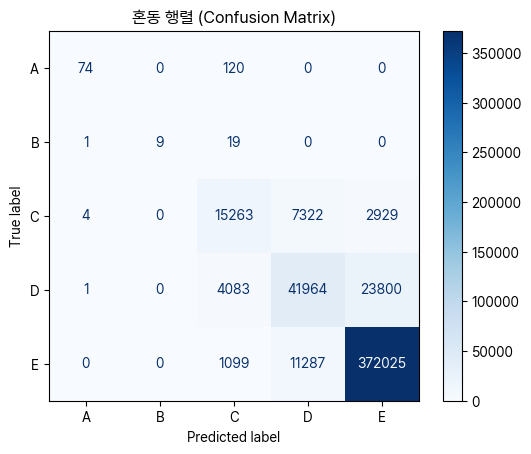

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 예측값: y_pred, 실제값: y_val (숫자형), 또는 문자형이면 inverse_transform 먼저
cm = confusion_matrix(y_val, y_pred, labels=[0,1,2,3,4])  # 또는 labels=le_y.transform(['A','B','C','D','E'])

# 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_y.classes_)
disp.plot(cmap='Blues', values_format='d')

plt.title("혼동 행렬 (Confusion Matrix)")
plt.grid(False)
plt.show()

- 기존보다 피처 선정 후 (EDA 기반) 정확도 소폭 향상 (B, C , D 예측 상승)

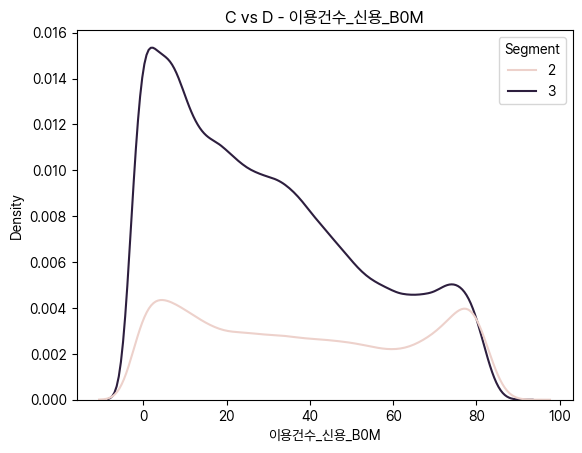

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

target_names = ['A', 'B', 'C', 'D', 'E']
df_vis = df.copy()
df_vis["Segment"] = le_y.fit_transform(df_vis["Segment"])  # 이미 인코딩되어 있다면 생략

# 예: '이용건수_신용_B0M' 분포
sns.kdeplot(data=df_vis[df_vis['Segment'].isin([2, 3])], x='이용건수_신용_B0M', hue='Segment')
plt.title('C vs D - 이용건수_신용_B0M')
plt.show()

In [22]:
binary_df = df[df["Segment"].isin(["C", "D"])]
X_bin = binary_df[selected_feature]
y_bin = binary_df["Segment"].map({"C": 0, "D": 1})

# 인코딩, 스케일링 동일하게 적용
# X_train_bin, X_val_bin, y_train_bin, y_val_bin → 모델 학습

# 성능 확인 → 어떤 피처가 가장 기여했는지 중요도 확인

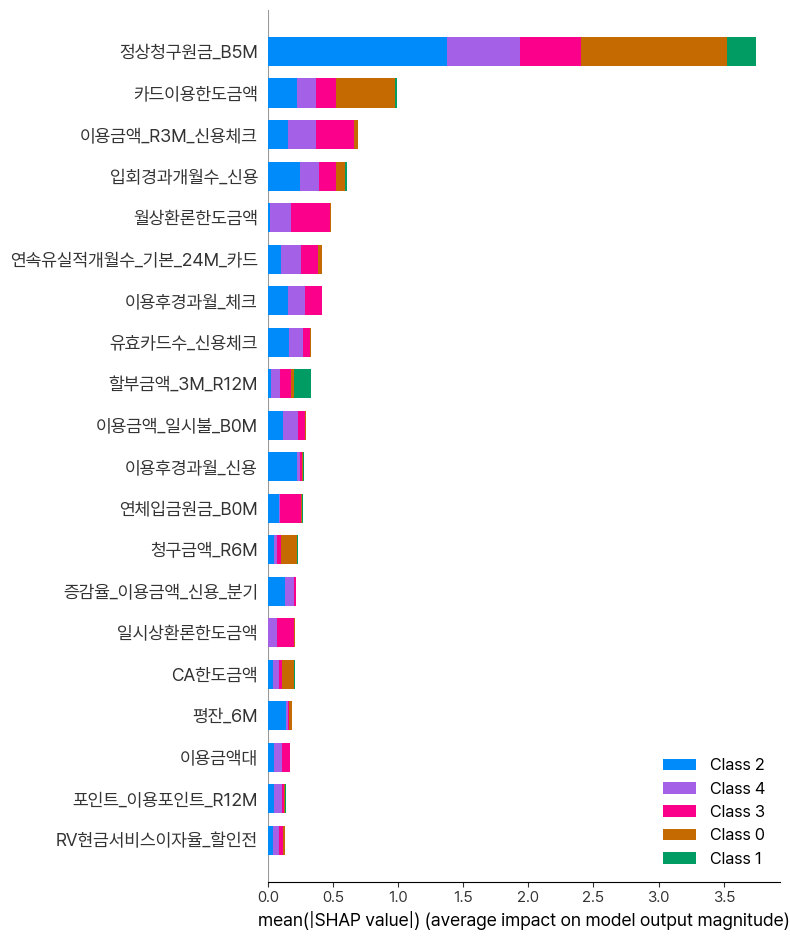

In [23]:
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_val)

shap.summary_plot(shap_values, X_val, plot_type="bar")